In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from svm_margin_plot import plot_svm_boundary
from sklearn.model_selection import GridSearchCV

# Mouse viral study
- Med_1_mL: Amount of medicine 1 in ml
- Med_2_mL: Amount of medicine 2 in ml
- Virus Present: Presence of the virus 2 weeks after administration

In [40]:
df = pd.read_csv("../data/mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


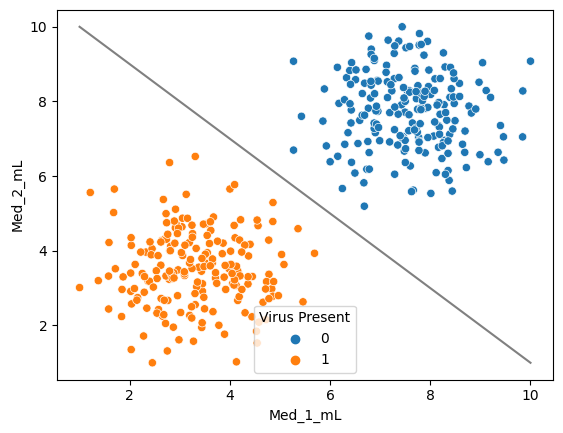

In [41]:
sns.scatterplot(data=df ,x="Med_1_mL", y="Med_2_mL", hue="Virus Present")

# HYPERPLANE (2d line)
x = np.linspace(1, 10, 100)
m = -1
b = 11

y = m*x + b
plt.plot(x, y, "grey")

In [42]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [43]:
y = df["Virus Present"]
X = df.drop("Virus Present", axis=1)

In [44]:
model = SVC(kernel="linear", C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

C:\Users\herme\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


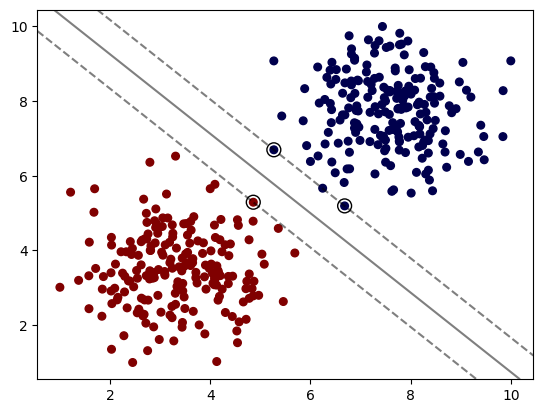

In [45]:
plot_svm_boundary(model, X, y)

### Exploration of Hyper Parameters (by testing multiple models)

C:\Users\herme\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


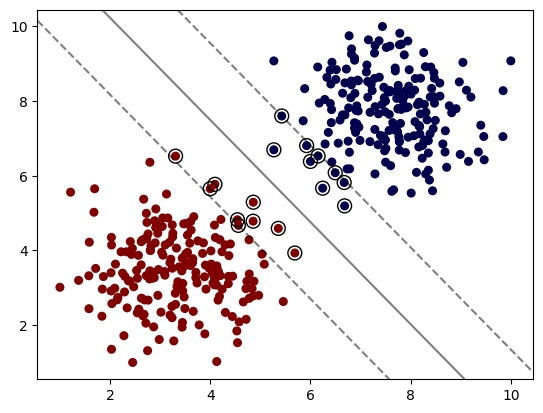

In [46]:
model = SVC(kernel="linear", C= 0.05)
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\herme\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


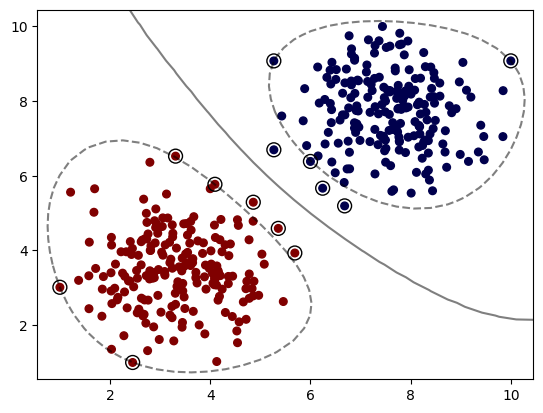

In [47]:
model = SVC(kernel="rbf", C= 1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\herme\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


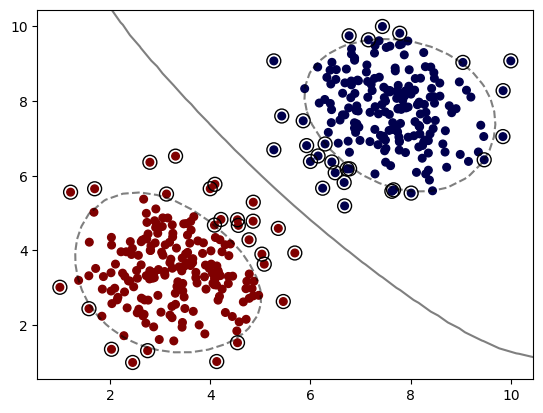

In [48]:
model = SVC(kernel="rbf", C= 0.1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\herme\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


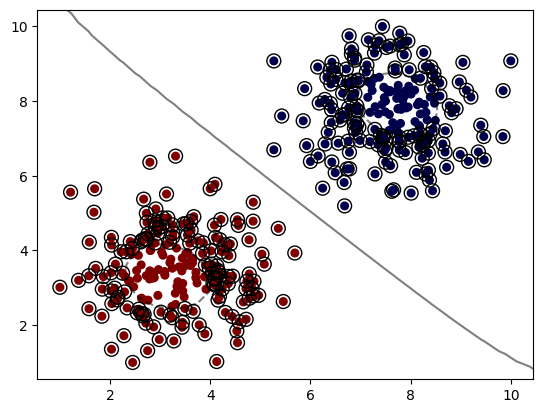

In [49]:
model = SVC(kernel="rbf", C= 0.01)
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\herme\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


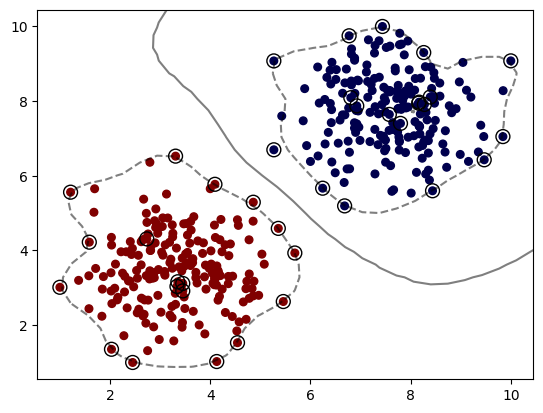

In [50]:
model = SVC(kernel="rbf", C= 1, gamma="auto")
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\herme\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


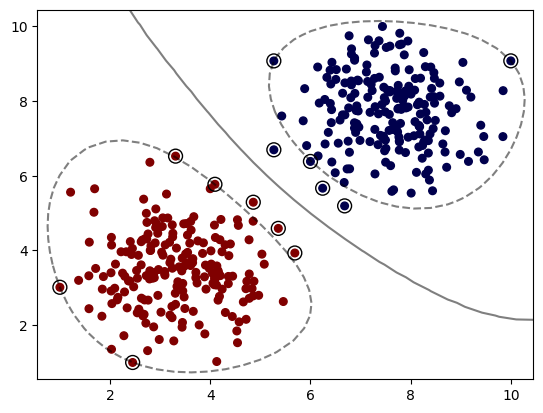

In [51]:
model = SVC(kernel="rbf", C= 1, gamma="scale")
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\herme\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


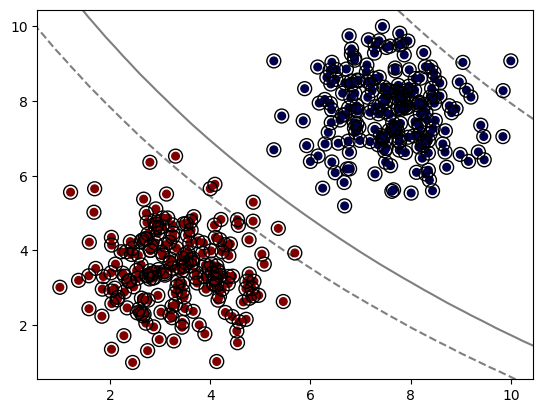

In [52]:
model = SVC(kernel="sigmoid", C= 1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\herme\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


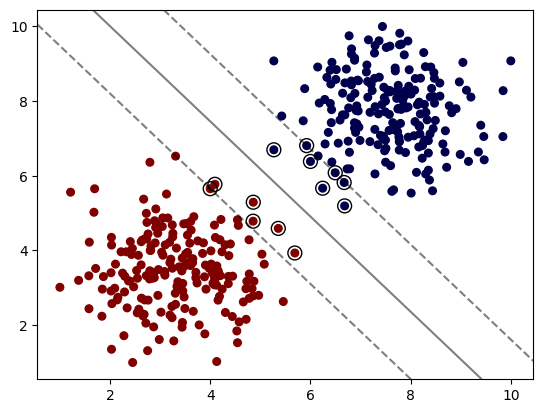

In [53]:
model = SVC(kernel="poly", C= 1, degree=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\herme\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


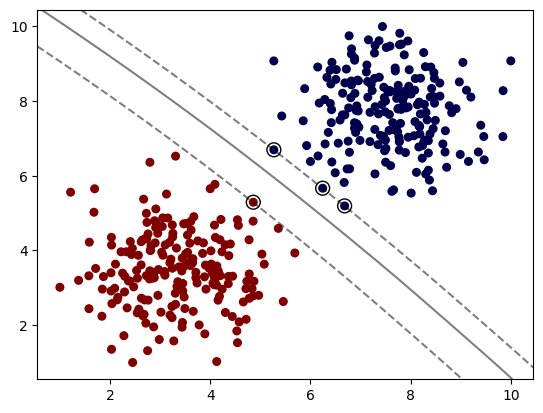

In [54]:
model = SVC(kernel="poly", C= 1, degree=6)
model.fit(X, y)
plot_svm_boundary(model, X, y)

### Observaçao
É muito dificil de racionalizar o comportamento de um Kernel que de o melhor hyperplano. Por isso a melhor tactica de escolha será a simples tentativa e erro.
Usar GridSearchCV

In [57]:
svm = SVC()
param_grid = {"C": [0.01, 0.1, 1], "kernel":["linear", "rbf"]}
grid = GridSearchCV(svm, param_grid)
grid.fit(X, y)
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}